### 1. 목표 설정
- 보스턴 집값 데이터를 이용해서 회귀분석을 진행해보자.
- 특성곱을 이용해서 새로운 특성을 만들어보자.
- 규제 모델을 이용해서 모델의 복잡도를 제어해보자

### 2. 데이터 수집
- csv 파일 불러오기(보스턴 주택 데이터)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv('./data/boston_housing.csv')

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**특성 정보 확인**
- CRIM : 범죄율
- INDUS : 비소매상업지역의 면적 비율
- NOX : 대기중 일산화질소의 농도
- RM : 주택당 방의 개수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인의 비율
- PTRATIO : 학생 / 교사 비율
- ZN : 25,000 평방 피트를 초과한 거주지역의 비율
- CHAS : 찰스강의 경계에 위치한 경우는 1, 아닌 경우는 0
- AGE : 1940년 이전에 지어진 주택의 비율
- DIS : 직업센터의 거리
- TAX : 재산세율

**종속변수 확인**
- MEDV : 집값, 주택 가격

### 3. 데이터 전처리
- 결측치 없었다.
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 깔끔한 데이터이다.

### 4. EDA
- 생략

### 5. 모델링
- 데이터 분리(X_train, X_test, y_train, y_test)
- 모델 선정 및 학습 / 평가 / 예측

In [6]:
# 데이터 분리
# step.1 : 데이터를 분리하기 위한 모듈 불러오기
from sklearn.model_selection import train_test_split
# step.2 : 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:,:-1], boston.iloc[:,-1], random_state=42, test_size=0.3)
# step.3 : 데이터 분할 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((354, 13), (152, 13), (354,), (152,))

In [7]:
# 분할된 데이터를 가지고 상관계수 확인하기
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.205413,0.399643,-0.041852,0.402031,-0.210556,0.336697,-0.371149,0.622745,0.582164,0.296443,-0.304734,0.409681
ZN,-0.205413,1.000000,-0.544907,-0.031898,-0.527921,0.299282,-0.583271,0.672752,-0.318947,-0.306276,-0.375349,0.172134,-0.393315
INDUS,0.399643,-0.544907,1.000000,0.074533,0.764135,-0.407417,0.635749,-0.700550,0.579284,0.702541,0.362794,-0.333391,0.578976
CHAS,-0.041852,-0.031898,0.074533,1.000000,0.100199,0.139175,0.083140,-0.110392,0.047212,0.012041,-0.087582,0.071473,-0.103874
NOX,0.402031,-0.527921,0.764135,0.100199,1.000000,-0.305756,0.733034,-0.775599,0.595620,0.655932,0.169297,-0.339474,0.581960
RM,-0.210556,0.299282,-0.407417,0.139175,-0.305756,1.000000,-0.227609,0.217510,-0.219261,-0.296173,-0.345720,0.122512,-0.618609
AGE,0.336697,-0.583271,0.635749,0.083140,0.733034,-0.227609,1.000000,-0.753570,0.425143,0.475100,0.230440,-0.248012,0.550824
DIS,-0.371149,0.672752,-0.700550,-0.110392,-0.775599,0.217510,-0.753570,1.000000,-0.476497,-0.523633,-0.218248,0.269588,-0.474187
RAD,0.622745,-0.318947,0.579284,0.047212,0.595620,-0.219261,0.425143,-0.476497,1.000000,0.909381,0.481114,-0.403437,0.473225
TAX,0.582164,-0.306276,0.702541,0.012041,0.655932,-0.296173,0.475100,-0.523633,0.909381,1.000000,0.465101,-0.407992,0.525003


<Axes: >

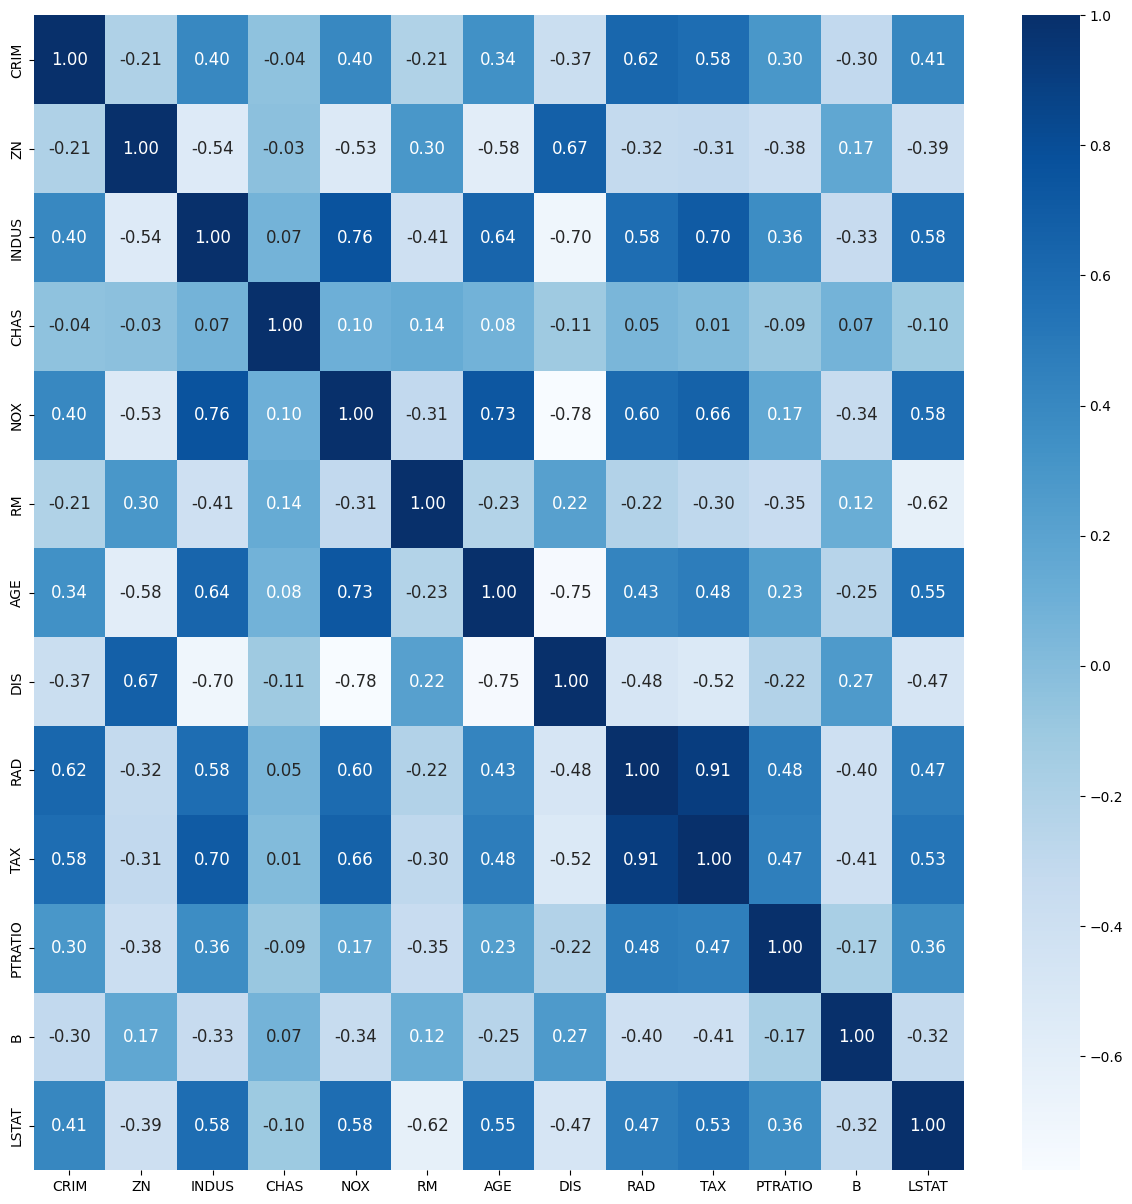

In [8]:
# 상관계수를 히트맵으로 출력
plt.figure(figsize=(15, 15))

sns.heatmap(data = X_train.corr(),
            annot = True, # 히트맵 내부에 글씨 출력
            annot_kws = {'size' : 12}, # 내부 글씨의 옵션(글씨의 크기)
            fmt = '.2f', # 소수점 자리 출력
            cmap = 'Blues' # 히트맵의 색상
           )
            

In [9]:
# 선형 회귀 모델 사용하기
# Step.1 : 모델 import
from sklearn.linear_model import LinearRegression

In [10]:
# Step.2 : 모델 객체 생성
lr = LinearRegression()

In [11]:
# Step.3 : 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step.4 : 교차검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(lr, X_train, y_train)
print(result)
print(result.mean())

[0.74541483 0.52216586 0.75607169 0.76738846 0.64887182]
0.6879825316957138


In [13]:
# 가중치 w 확인 해보기
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [14]:
# 편향 b 값 확인 해보기
lr.intercept_

31.631084035694286

In [15]:
# 정답 예측
pre = lr.predict(X_test)
pre

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

- 회귀 평가 지표를 이용해서, 모델을 평가해보자
- mse, mae, rmse, r2_score

In [16]:
# 평가지표 import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
# mse 사용하기
mean_squared_error(y_test, pre)

21.51744423117709

In [18]:
# mae 사용하기
mean_absolute_error(y_test, pre)

3.1627098714573947

In [19]:
# rmse 사용하기 (sklearn에서 자체적으로는 지원 x)
np.sqrt(mean_squared_error(y_test, pre))

4.638689926172808

In [20]:
# r2_score 사용하기
r2_score(y_test, pre)

0.7112260057484948

In [21]:
y_test.shape, pre.shape

((152,), (152,))

- 현재 회귀모델은 성능이 그렇게 좋은 편은 아닌거 같다.
- 선형회귀모델은 특성이 많을수록 성능 상승
- 특성이 적은 경우 모델이 간단해져 성능이 낮다
- 모델을 제어할 수 있는 하이퍼 파라미터 조정이 불가능하기 때문
- 특성 곱을 이용해 새로운 특성 만들어보자

**원본 데이터 프레임 복사하기**

In [23]:
x_train_copy = X_train.copy()

In [24]:
# 기존의 훈련용 문제 데이터에 훈련용 정답 컬럼을 추가해주자
# 정답을 포함한 상관관계를 파악하기 위해서
x_train_copy['MEDV'] = y_train

In [25]:
x_train_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.205413,0.399643,-0.041852,0.402031,-0.210556,0.336697,-0.371149,0.622745,0.582164,0.296443,-0.304734,0.409681,-0.380453
ZN,-0.205413,1.000000,-0.544907,-0.031898,-0.527921,0.299282,-0.583271,0.672752,-0.318947,-0.306276,-0.375349,0.172134,-0.393315,0.329526
INDUS,0.399643,-0.544907,1.000000,0.074533,0.764135,-0.407417,0.635749,-0.700550,0.579284,0.702541,0.362794,-0.333391,0.578976,-0.459568
CHAS,-0.041852,-0.031898,0.074533,1.000000,0.100199,0.139175,0.083140,-0.110392,0.047212,0.012041,-0.087582,0.071473,-0.103874,0.226487
NOX,0.402031,-0.527921,0.764135,0.100199,1.000000,-0.305756,0.733034,-0.775599,0.595620,0.655932,0.169297,-0.339474,0.581960,-0.406677
RM,-0.210556,0.299282,-0.407417,0.139175,-0.305756,1.000000,-0.227609,0.217510,-0.219261,-0.296173,-0.345720,0.122512,-0.618609,0.698491
AGE,0.336697,-0.583271,0.635749,0.083140,0.733034,-0.227609,1.000000,-0.753570,0.425143,0.475100,0.230440,-0.248012,0.550824,-0.350505
DIS,-0.371149,0.672752,-0.700550,-0.110392,-0.775599,0.217510,-0.753570,1.000000,-0.476497,-0.523633,-0.218248,0.269588,-0.474187,0.241323
RAD,0.622745,-0.318947,0.579284,0.047212,0.595620,-0.219261,0.425143,-0.476497,1.000000,0.909381,0.481114,-0.403437,0.473225,-0.384704
TAX,0.582164,-0.306276,0.702541,0.012041,0.655932,-0.296173,0.475100,-0.523633,0.909381,1.000000,0.465101,-0.407992,0.525003,-0.452308


In [28]:
# 내부의 상관계수 값을 절대값으로 변경
x_train_abs = x_train_copy.corr().abs()
# 절대값으로 변경된 상관계수를 내림차순 정렬
x_train_abs.sort_values(by = 'MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.380453,0.329526,0.459568,0.226487,0.406677,0.698491,0.350505,0.241323,0.384704,0.452308,0.492096,0.324991,0.747107,1.000000
LSTAT,0.409681,0.393315,0.578976,0.103874,0.581960,0.618609,0.550824,0.474187,0.473225,0.525003,0.361428,0.324208,1.000000,0.747107
RM,0.210556,0.299282,0.407417,0.139175,0.305756,1.000000,0.227609,0.217510,0.219261,0.296173,0.345720,0.122512,0.618609,0.698491
PTRATIO,0.296443,0.375349,0.362794,0.087582,0.169297,0.345720,0.230440,0.218248,0.481114,0.465101,1.000000,0.169999,0.361428,0.492096
INDUS,0.399643,0.544907,1.000000,0.074533,0.764135,0.407417,0.635749,0.700550,0.579284,0.702541,0.362794,0.333391,0.578976,0.459568
TAX,0.582164,0.306276,0.702541,0.012041,0.655932,0.296173,0.475100,0.523633,0.909381,1.000000,0.465101,0.407992,0.525003,0.452308
NOX,0.402031,0.527921,0.764135,0.100199,1.000000,0.305756,0.733034,0.775599,0.595620,0.655932,0.169297,0.339474,0.581960,0.406677
RAD,0.622745,0.318947,0.579284,0.047212,0.595620,0.219261,0.425143,0.476497,1.000000,0.909381,0.481114,0.403437,0.473225,0.384704
CRIM,1.000000,0.205413,0.399643,0.041852,0.402031,0.210556,0.336697,0.371149,0.622745,0.582164,0.296443,0.304734,0.409681,0.380453
AGE,0.336697,0.583271,0.635749,0.083140,0.733034,0.227609,1.000000,0.753570,0.425143,0.475100,0.230440,0.248012,0.550824,0.350505


- 상관관계의 범위는 -1 ~ 1
- 현재 절대값 변경된 상관계수를 확인 -> 같은 컬럼을 제외한 상관계수가 높은 컬럼 2개를 찾아보자.
- LSTAT과 RM이라는 컬럼이 상관계수가 높았다 -> 이 두가지의 컬럼을 가지고 특성 곱이라는 확장을 진행

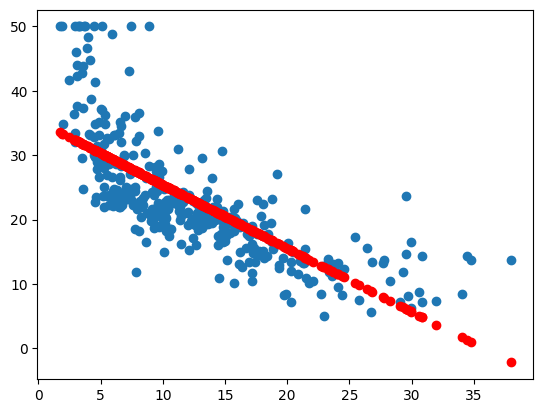

In [33]:
# 상관관계가 높은 데이터를 가지고 특성 확장 해보기
# 확장전) 먼저 LSTAT 특성만 가지고 학습시킨후 예측을 어떻게 하는지 시각화
# 모델 학습
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train) # 2차원이 요구되기 때문에 대괄호 2개
pre = model.predict(X_train[['LSTAT']])

# 차트 그려보기
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre, color='red')
plt.show()

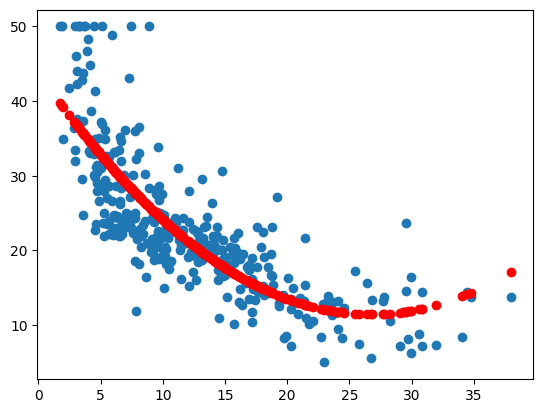

In [34]:
# 특성 확장 후 : 본래 LSTAT 특성과 확장 LSTAT 특성을 가지고 학습 시킨 후 예측을 어떻게 하는지 보자
X_train['LSTAT x LSTAT'] = X_train['LSTAT']*X_train['LSTAT']
# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)
pre = model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

# 차트 그려보기
plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre, color='red')
plt.show()

- 직선의 형태가 아니네? -> 곡선이면 비선형인가?
- 다항 회귀의 이해가 필요하다
- 다항 회귀 : 독립변수 단항식이 아닌(독립변수 X가 1개가 아닌) 2차, 3차 방정식과 같은 다항식으로 표현된 것이 다항 회귀라고 한다!

<font color = 'red'>  주의) <br>
    1. 다항 회귀를 선형이 아닌 비선형으로 혼동할 수 있다. -> 선형 회귀라는 것을 기억하자. <br>
    2. 선형/비선형 회귀를 나누는 기준? -> 가중치(회귀 계수, w)가 선형 / 비선형인지를 확인해보자. <br>
    3. 독립변수(문제 데이터, 특성, X)가 선형 / 비선형인지를 따르지 않는다. </font>

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           354 non-null    float64
 1   ZN             354 non-null    float64
 2   INDUS          354 non-null    float64
 3   CHAS           354 non-null    float64
 4   NOX            354 non-null    float64
 5   RM             354 non-null    float64
 6   AGE            354 non-null    float64
 7   DIS            354 non-null    float64
 8   RAD            354 non-null    float64
 9   TAX            354 non-null    float64
 10  PTRATIO        354 non-null    float64
 11  B              354 non-null    float64
 12  LSTAT          354 non-null    float64
 13  LSTAT x LSTAT  354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [37]:
# X_test에도 확장 LSTAT을 추가 시켜줘보자
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']

In [38]:
# 모델 제작
model = LinearRegression()

In [40]:
# 모델 학습
model.fit(X_train, y_train) # 이때 X_train에는 확장된 LSTAT 컬럼 추가

LinearRegression()

In [41]:
# 모델 평가 - score
model.score(X_test, y_test)

0.7734457360506529

In [42]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT x LSTAT
CRIM,1.000000,-0.205413,0.399643,-0.041852,0.402031,-0.210556,0.336697,-0.371149,0.622745,0.582164,0.296443,-0.304734,0.409681,0.393592
ZN,-0.205413,1.000000,-0.544907,-0.031898,-0.527921,0.299282,-0.583271,0.672752,-0.318947,-0.306276,-0.375349,0.172134,-0.393315,-0.313641
INDUS,0.399643,-0.544907,1.000000,0.074533,0.764135,-0.407417,0.635749,-0.700550,0.579284,0.702541,0.362794,-0.333391,0.578976,0.510181
CHAS,-0.041852,-0.031898,0.074533,1.000000,0.100199,0.139175,0.083140,-0.110392,0.047212,0.012041,-0.087582,0.071473,-0.103874,-0.085570
NOX,0.402031,-0.527921,0.764135,0.100199,1.000000,-0.305756,0.733034,-0.775599,0.595620,0.655932,0.169297,-0.339474,0.581960,0.525167
RM,-0.210556,0.299282,-0.407417,0.139175,-0.305756,1.000000,-0.227609,0.217510,-0.219261,-0.296173,-0.345720,0.122512,-0.618609,-0.538245
AGE,0.336697,-0.583271,0.635749,0.083140,0.733034,-0.227609,1.000000,-0.753570,0.425143,0.475100,0.230440,-0.248012,0.550824,0.482233
DIS,-0.371149,0.672752,-0.700550,-0.110392,-0.775599,0.217510,-0.753570,1.000000,-0.476497,-0.523633,-0.218248,0.269588,-0.474187,-0.426050
RAD,0.622745,-0.318947,0.579284,0.047212,0.595620,-0.219261,0.425143,-0.476497,1.000000,0.909381,0.481114,-0.403437,0.473225,0.430684
TAX,0.582164,-0.306276,0.702541,0.012041,0.655932,-0.296173,0.475100,-0.523633,0.909381,1.000000,0.465101,-0.407992,0.525003,0.476011


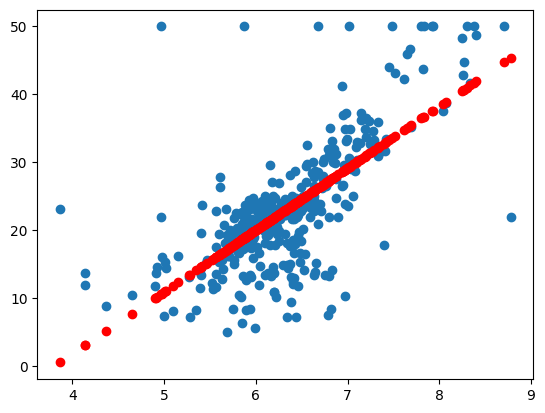

In [43]:
# 특성 확장 하나 더 추가
# 특성 확장 후 : 본래 RM 특성과 확장 RM 특성을 가지고 학습 시킨 후 예측을 어떻게 하는지 보자

# 모델 학습
model = LinearRegression()
model.fit(X_train[['RM']], y_train)
pre = model.predict(X_train[['RM']])

# 차트 그려보기
plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre, color='red')
plt.show()

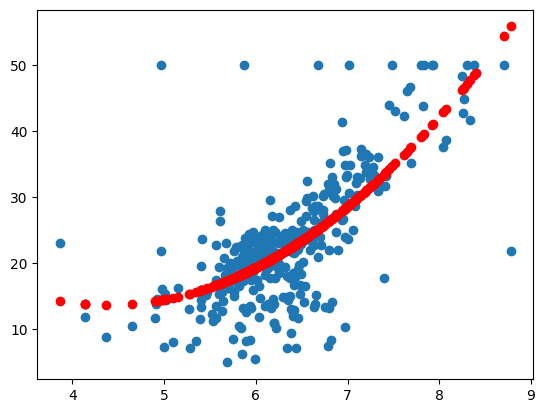

In [44]:
# 특성 확장 후 : 본래 RM 특성과 확장 RM 특성을 가지고 학습 시킨 후 예측을 어떻게 하는지 보자
X_train['RM x RM'] = X_train['RM']*X_train['RM']
# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[['RM', 'RM x RM']], y_train)
pre = model2.predict(X_train[['RM', 'RM x RM']])

# 차트 그려보기
plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre, color='red')
plt.show()

In [45]:
# RM특성 확장해서 실제 평가까지 진행
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           354 non-null    float64
 1   ZN             354 non-null    float64
 2   INDUS          354 non-null    float64
 3   CHAS           354 non-null    float64
 4   NOX            354 non-null    float64
 5   RM             354 non-null    float64
 6   AGE            354 non-null    float64
 7   DIS            354 non-null    float64
 8   RAD            354 non-null    float64
 9   TAX            354 non-null    float64
 10  PTRATIO        354 non-null    float64
 11  B              354 non-null    float64
 12  LSTAT          354 non-null    float64
 13  LSTAT x LSTAT  354 non-null    float64
 14  RM x RM        354 non-null    float64
dtypes: float64(15)
memory usage: 44.2 KB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           152 non-null    float64
 1   ZN             152 non-null    float64
 2   INDUS          152 non-null    float64
 3   CHAS           152 non-null    float64
 4   NOX            152 non-null    float64
 5   RM             152 non-null    float64
 6   AGE            152 non-null    float64
 7   DIS            152 non-null    float64
 8   RAD            152 non-null    float64
 9   TAX            152 non-null    float64
 10  PTRATIO        152 non-null    float64
 11  B              152 non-null    float64
 12  LSTAT          152 non-null    float64
 13  LSTAT x LSTAT  152 non-null    float64
 14  RM x RM        152 non-null    float64
dtypes: float64(15)
memory usage: 19.0 KB


In [47]:
# X_test에도 확장 RM을 추가 시켜줘보자
X_test['RM x RM'] = X_test['RM'] * X_test['RM']

In [49]:
# 모델 제작
model = LinearRegression()

In [50]:
# 모델 학습
model.fit(X_train, y_train) # 이때 X_train에는 확장된 LSTAT, RM 컬럼 추가

LinearRegression()

In [51]:
# 모델 평가 - score
model.score(X_test, y_test)

0.8152019190614918

- 정리
    - 특성확장을 진행해서 선형회귀 모델의 성능이 개선된 것을 확인했다.
    - 기존에는 LSTAT과 RM이라는 컬럼만 특성확장을 진행
    - 전체 컬럼을 가지고 특성 확장을 진행하면 성능이 좋아지지 않을까?

In [53]:
X_train.drop(['LSTAT x LSTAT', "RM x RM"], axis=1, inplace=True)
X_test.drop(['LSTAT x LSTAT', "RM x RM"], axis=1, inplace=True)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB


In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [56]:
X_train_copy2 = X_train.copy()

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
for col1 in X_train.columns:
    for col2 in X_train.columns :
        X_train_copy2[col1+'x'+col2] = X_train[col1] * X_train[col2]

In [62]:
X_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 506.1 KB


In [63]:
X_test_copy2 = X_test.copy()

for col1 in X_test.columns:
    for col2 in X_test.columns :
        X_test_copy2[col1+'x'+col2] = X_test[col1] * X_test[col2]
X_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 217.3 KB


In [64]:
model = LinearRegression()

In [70]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

In [71]:
model.fit(X_train_copy2, y_train)

LinearRegression()

In [72]:
model.score(X_test_copy2, y_test)

0.6610321970554701

In [74]:
model.score(X_train_copy2, y_train)

0.9469794920108191

- 특성 확장을 진행 해봤더니 성능 자체는 올라 간 것처럼 보인다.
- 하지만 모델 자체가 복잡해져서 과대적합의 모습을 보이고 있다.
- 일반화에는 크게 도움이 된 것 같지 않다.

### 규제
- 선형회귀에서 모델의 일반화를 위해 과적합 상태를 어떻게 제어할 것인가?

- L1 Lasso 규제 : 가중치에 똑같은 힘으로 규제를 적용하는 방법. 자동으로 특성선택이 일어남
- L2 Ridge 규제 : 모든 가중치에 같은 비율로 규제를 적용하는 방법. 0이 되면 가중치가 없다 -> 비율이라는 방법으로 규제를 적용하기 때문

### Ridge 모델

In [75]:
# 모델 import
from sklearn.linear_model import Ridge

In [76]:
# 모델 객체 생성
# alpha : 규제의 강도를 정해주는 파라미터
# alpha가 높아지면 규제 강도가 강해지고 낮아지면 규제 강도가 약화된다
ridge_model = Ridge(alpha=100)

In [77]:
# 모델학습
ridge_model.fit(X_train_copy2, y_train)

Ridge(alpha=100)

In [78]:
# 모델 평가
ridge_model.score(X_test_copy2, y_test)

0.7960984809165558

### Lasso 모델

In [79]:
from sklearn.linear_model import Lasso

In [91]:
lasso_model = Lasso(alpha=10)

In [92]:
lasso_model.fit(X_train_copy2, y_train)

Lasso(alpha=10)

In [93]:
lasso_model.score(X_train_copy2, y_train)

0.8625803324294886

In [94]:
lasso_model.score(X_test_copy2, y_test)

0.8022301748919957

In [95]:
# 반복문을 이용해서 Ridge와 Lasso alpha값을 조절해보고 모델을 비교해보자
# 1. 알파값(규제강도) 리스트 만들어주기
alpha_list= [0.001, 0.01, 0.1, 10, 100, 1000]
# 2. ridge 모델과 lasso 모델 가중치를 기록할 리스트 생성
ridge_coef_list = []
lasso_coef_list = []

# 3. 반복문 만들기 - 모델 제작 / 학습 / 리스트에 기록
for i in alpha_list:
    r_model = Ridge(alpha=i)
    l_model = Lasso(alpha=i)
    
    # 모델 학습
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    
    # 가중치 확인 후 리스트에 넣기
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [97]:
# lasso 정규화 w값 확인해보기
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T,
                       columns=alpha_list)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.133223,-0.131004,-0.122854,-0.000000,-0.000000,-0.0
1,0.035854,0.036263,0.038639,0.014062,0.000000,0.0
2,0.048042,0.034707,-0.000497,-0.000000,-0.000000,-0.0
3,3.102183,2.943313,1.483538,0.000000,0.000000,0.0
4,-15.065440,-11.901274,-0.000000,0.000000,-0.000000,-0.0
5,4.056539,4.050578,3.893674,0.000000,0.000000,0.0
6,-0.011083,-0.013446,-0.019605,0.000000,-0.000000,-0.0
7,-1.380312,-1.329162,-1.105614,-0.000000,0.000000,0.0
8,0.241912,0.234583,0.216673,0.000000,-0.000000,-0.0
9,-0.008732,-0.009000,-0.010584,-0.008345,-0.020678,-0.0


In [98]:
# ridge 정규화 w값 확인해보기
ridge_df = pd.DataFrame(np.array(ridge_coef_list).T,
                       columns=alpha_list)
ridge_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.133460,-0.133368,-0.132535,-0.126548,-0.130284,-0.116874
1,0.035811,0.035829,0.035994,0.039499,0.044880,0.043391
2,0.049460,0.048906,0.043848,-0.008762,-0.026550,-0.027645
3,3.119582,3.117318,3.095676,2.107585,0.611111,0.096161
4,-15.402228,-15.270005,-14.062595,-1.433987,-0.141540,-0.004726
5,4.057248,4.057679,4.061319,3.782848,2.133418,0.466352
6,-0.010834,-0.010949,-0.012001,-0.019846,-0.004199,0.026235
7,-1.385773,-1.383769,-1.365474,-1.178253,-1.066613,-0.481900
8,0.242691,0.242371,0.239464,0.225284,0.271421,0.240453
9,-0.008703,-0.008715,-0.008817,-0.010459,-0.012119,-0.011759


# 최종 정리
- 현재 보스턴 선형회귀분석 시 라쏘가 조금 더 유리한 모습을 보인다